# druksensor ijken

## Deel 1
Ijken van een druksensor

### IDEE
- moeten een sensor ijken doordat de arduino onduidelijk output / input heeft.
- wat we weten is dat de sensor lineair is, dus heb je twee punten, dan kun je ijking maken
- we weten ook dat de tube vaak niet te verwaarlozen is, dus we knippen kleine tube en meten bij 50mL de druk (atm druk ) en bij 25 mL. Althans, we meten daar de spanningen


p2 = V1/V2 * p1 + p0



In [1]:
# meting op 17 sept, met arduino mkr

# at 50mL ofwel atm
# 1018 hPa
#  raw 255, V = 0.823
# 
# at 25 mL ofwel 2 atm
# raw 443 1.429 



C:\Users\fpols\AppData\Local\Temp\ipykernel_25004\48722179.py:20: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(linear_fit, v_ijk, p_ijk)


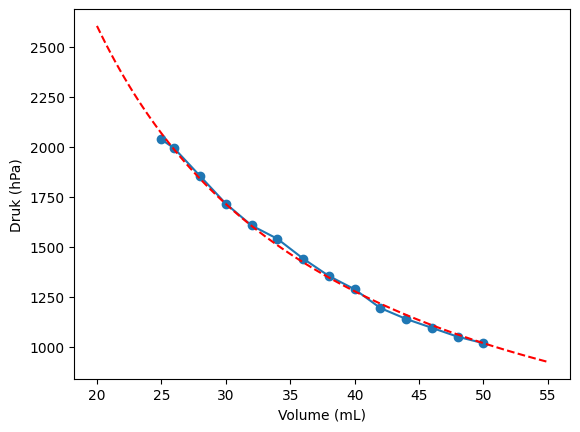

In [9]:
volume = np.array([50, 48, 46, 
                   44, 42, 40, 
                   38, 36, 34, 
                   32, 30, 28, 
                   26, 25])

voltage = np.array([826, 845, 871, 
                    897, 929, 984, 
                    1023, 1074, 1132, 
                    1171, 1235, 1316, 
                    1397, 1423])*1e-3  # in V


v_ijk = np.array([826, 1423])*1e-3
p_ijk = np.array([1018, 2036])  # in hPa

def linear_fit(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_fit, v_ijk, p_ijk)



pressure = linear_fit(voltage, *params)


def pVrelatie(V, a, dV):
    return a / (V + dV)

params2, covariance2 = curve_fit(pVrelatie, volume, pressure, p0=[2000, 0])

v_test = np.linspace(0.8*min(volume), 1.1*max(volume), 100)
p_test = pVrelatie(v_test, *params2)

plt.figure()
plt.plot(volume, pressure, 'o-')
plt.plot(v_test, p_test, 'r--', label='Fit')
plt.xlabel('Volume (mL)')
plt.ylabel('Druk (hPa)')
plt.show()